In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
# Load the wine dataset (file path can be adjusted as needed)
try:
    wine = pd.read_csv("wine.csv", header=None)  # Use "wine.csv" or other flexible path
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("The file 'wine.csv' was not found. Please check the file path and try again.")

Dataset loaded successfully.


In [22]:
# Define column names for readability
wine.columns = [
    'name', 'alcohol', 'malicAcid', 'ash', 'ashalcalinity', 'magnesium',
    'totalPhenols', 'flavanoids', 'nonFlavanoidPhenols', 'proanthocyanins',
    'colorIntensity', 'hue', 'od280_od315', 'proline'
]

In [23]:
# Check for missing values
if wine.isnull().sum().any():
    print("Warning: Missing values found. Please clean the dataset.")


In [24]:
# Convert columns to numeric, with error handling
for col in wine.columns[1:]:  # Skip the 'name' column
    wine[col] = pd.to_numeric(wine[col], errors='coerce')  # Coerce errors to NaN

In [25]:
# Separate the dataset into features (X) and target (y)
X = wine.drop('name', axis=1)
y = wine['name']

In [26]:
# Handle any NaN values in the numeric columns after conversion
if X.isnull().sum().any():
    X.fillna(X.mean(), inplace=True)  # Fill NaNs with column means for simplicity


In [27]:
# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

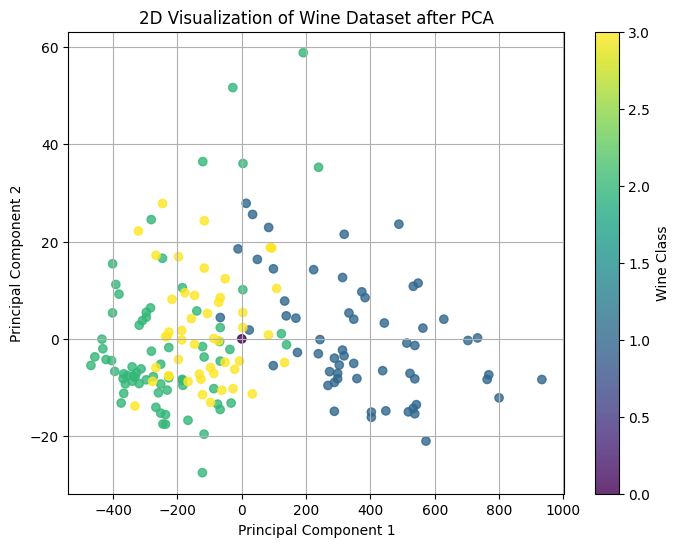

In [28]:
# Plot the 2D data after PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y)[0], cmap='viridis', alpha=0.8)
plt.title('2D Visualization of Wine Dataset after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Wine Class')
plt.grid(True)
plt.show()

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Normalize the training data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [30]:
# Naive Bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_normalized, y_train)

GaussianNB()

In [31]:
# Predictions and evaluation
y_pred_nb = naive_bayes_classifier.predict(X_test_normalized)
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.93      0.74      0.82        19
           3       0.55      0.86      0.67         7

    accuracy                           0.83        36
   macro avg       0.83      0.86      0.83        36
weighted avg       0.88      0.83      0.84        36

Confusion Matrix:
 [[10  0  0]
 [ 0 14  5]
 [ 0  1  6]]
